In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
import pandas as pd 
import numpy as np 
import plotly.graph_objects as go
import plotly.express as px
import scipy.stats as stats
from IPython.display import display, HTML
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn import base
from sklearn.model_selection import KFold

In [2]:
def create_scrollable_table(df, table_id, title):
    html = f'<h3>{title}</h3>'
    html += f'<div id="{table_id}" style="height:200px; overflow:auto;">'
    html += df.to_html()
    html += '</div>'
    return html

In [38]:
df = pd.read_csv('houses.csv')
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,lat,longs
0,221900.0,3,1.00,1180,5650,1.0,3,3,1180,0,1955,47.5112,-122.257
1,180000.0,2,1.00,770,10000,1.0,3,2,770,0,1933,47.7379,-122.233
2,604000.0,4,3.00,1960,5000,1.0,5,3,1050,910,1965,47.5208,-122.393
3,510000.0,3,2.00,1680,8080,1.0,3,4,1680,0,1987,47.6168,-122.045
4,257500.0,3,2.25,1715,6819,2.0,3,3,1715,0,1995,47.3097,-122.327
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15271,360000.0,3,2.50,1530,1131,3.0,3,4,1530,0,2009,47.6993,-122.346
15272,400000.0,4,2.50,2310,5813,2.0,3,4,2310,0,2014,47.5107,-122.362
15273,402101.0,2,0.75,1020,1350,2.0,3,3,1020,0,2009,47.5944,-122.299
15274,400000.0,3,2.50,1600,2388,2.0,3,4,1600,0,2004,47.5345,-122.069


In [4]:
df["bedrooms"].unique()

array([3, 2, 4, 5, 1], dtype=int64)

In [5]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'lat',
       'long'],
      dtype='object')

In [6]:
df.shape

(15276, 13)

In [7]:
#remove leading and trailing whitespaces from all columns
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15276 entries, 0 to 15275
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          15276 non-null  float64
 1   bedrooms       15276 non-null  int64  
 2   bathrooms      15276 non-null  float64
 3   sqft_living    15276 non-null  int64  
 4   sqft_lot       15276 non-null  int64  
 5   floors         15276 non-null  float64
 6   condition      15276 non-null  int64  
 7   grade          15276 non-null  int64  
 8   sqft_above     15276 non-null  int64  
 9   sqft_basement  15276 non-null  int64  
 10  yr_built       15276 non-null  int64  
 11  lat            15276 non-null  float64
 12  long           15276 non-null  float64
dtypes: float64(5), int64(8)
memory usage: 1.5 MB


In [9]:
df.duplicated().sum()

0

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
# Summary statistics for numerical features
numerical_features = df.select_dtypes(include=[np.number])
summary_stats = numerical_features.describe().T
html_numerical = create_scrollable_table(summary_stats, 'numerical_features', 'Summary statistics for numerical features')

display(HTML(html_numerical))

,count,mean,std,min,25%,50%,75%,max
price,15276.0,433523.916078,176316.841213,82000.0000,298000.0000,401000.0000,545000.0000,982000.0000
bedrooms,15276.0,3.228267,0.793221,1.0000,3.0000,3.0000,4.0000,5.0000
bathrooms,15276.0,1.957597,0.654787,0.5000,1.5000,2.0000,2.5000,3.7500
sqft_living,15276.0,1793.923737,616.149875,370.0000,1330.0000,1720.0000,2190.0000,3700.0000
sqft_lot,15276.0,7076.893297,3473.052661,520.0000,4720.7500,7088.5000,9000.0000,19501.0000
floors,15276.0,1.470542,0.546361,1.0000,1.0000,1.0000,2.0000,3.0000
condition,15276.0,3.413721,0.644619,2.0000,3.0000,3.0000,4.0000,5.0000
grade,15276.0,3.376538,0.896845,1.0000,3.0000,3.0000,4.0000,6.0000
sqft_above,15276.0,1582.985991,615.189722,370.0000,1130.0000,1430.0000,1920.0000,3490.0000
sqft_basement,15276.0,210.937745,332.951944,0.0000,0.0000,0.0000,400.0000,1240.0000


In [13]:
# Null values in the dataset
null_values = df.isnull().sum()
html_null_values = create_scrollable_table(null_values.to_frame(), 'null_values', 'Null values in the dataset')

# Percentage of missing values for each feature
missing_percentage = (df.isnull().sum() / len(df)) * 100
html_missing_percentage = create_scrollable_table(missing_percentage.to_frame(), 'missing_percentage', 'Percentage of missing values for each feature')

display(HTML(html_null_values + html_missing_percentage))

,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
condition,0
grade,0
sqft_above,0
sqft_basement,0


In [14]:
df.nunique()

price            2902
bedrooms            5
bathrooms          14
sqft_living       639
sqft_lot         6680
floors              5
condition           4
grade               6
sqft_above        621
sqft_basement     155
yr_built          116
lat              4612
long              529
dtype: int64

In [15]:
columns=df.columns.to_list()
outliers=[]

for col in columns:
    #print(col)
    mean=np.mean(df[col])
    std=np.std(df[col])
    for i in range(len(df)):
        item = df[col].iloc[i]
        z_score=(item-mean)/std
        if np.abs(z_score)>3:
            outliers.append(i)

outliers = set(outliers)
outliers = list(outliers)

In [16]:
ratio= len(outliers)/len(df)
ratio

0.018198481277821418

In [17]:
df.drop(df.index[outliers],inplace=True)

In [18]:
df.shape

(14998, 13)

In [19]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'lat',
       'long'],
      dtype='object')

In [20]:
features =["floors","lat","long","condition","bedrooms" ,"sqft_basement" ,"bathrooms","sqft_above","grade","sqft_living",'sqft_lot',"yr_built"]    
X= df[features]

In [21]:
X.columns

Index(['floors', 'lat', 'long', 'condition', 'bedrooms', 'sqft_basement',
       'bathrooms', 'sqft_above', 'grade', 'sqft_living', 'sqft_lot',
       'yr_built'],
      dtype='object')

In [22]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'lat',
       'long'],
      dtype='object')

In [23]:
y= df["price"]

In [24]:
y.head()

0    221900.0
1    180000.0
2    604000.0
3    510000.0
4    257500.0
Name: price, dtype: float64

In [25]:
# Assuming you have already defined X, num_features, cat_features, and preprocessor

# Import the required library for the new transformer (e.g., OrdinalEncoder)
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Create a new transformer for ordinal encoding

num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

ordinal_transformer = OrdinalEncoder()
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

# Add the new transformer to the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features)
        #("OrdinalEncoder", ordinal_transformer, ['condition', 'grade']),  # New transformer
    ],
    remainder='passthrough'  # This includes any other columns that were not specified above
)

# Now you can use the preprocessor to transform your data
X_preprocessed = preprocessor.fit_transform(X)


In [26]:
X = preprocessor.fit_transform(X)

In [27]:
X.shape

(14998, 12)

In [28]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((11998, 12), (3000, 12))

In [29]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [30]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 101612.8217
- Mean Absolute Error: 77221.2855
- R2 Score: 0.6597
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 102070.7373
- Mean Absolute Error: 77691.2327
- R2 Score: 0.6553


Lasso
Model performance for Training set
- Root Mean Squared Error: 101612.8218
- Mean Absolute Error: 77221.4004
- R2 Score: 0.6597
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 102070.7973
- Mean Absolute Error: 77691.4013
- R2 Score: 0.6553


Ridge
Model performance for Training set
- Root Mean Squared Error: 101612.8225
- Mean Absolute Error: 77221.1685
- R2 Score: 0.6597
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 102070.7011
- Mean Absolute Error: 77691.1140
- R2 Score: 0.6553


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 70232.5099
- Mean Absolut

In [31]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)


,Model Name,R2_Score
7,CatBoosting Regressor,0.885357
6,XGBRegressor,0.869142
5,Random Forest Regressor,0.858925
3,K-Neighbors Regressor,0.753464
4,Decision Tree,0.735402
8,AdaBoost Regressor,0.706487
2,Ridge,0.655274
0,Linear Regression,0.655274
1,Lasso,0.655274


In [32]:
lin_model = CatBoostRegressor()
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

Learning rate set to 0.060629
0:	learn: 166989.6096565	total: 2.69ms	remaining: 2.69s
1:	learn: 160292.8207140	total: 5.25ms	remaining: 2.62s
2:	learn: 154174.0604202	total: 7.72ms	remaining: 2.57s
3:	learn: 148504.6480649	total: 9.99ms	remaining: 2.49s
4:	learn: 143150.2923242	total: 12.1ms	remaining: 2.41s
5:	learn: 138211.9882831	total: 14.3ms	remaining: 2.36s
6:	learn: 133560.7964766	total: 16.3ms	remaining: 2.31s
7:	learn: 129599.9379965	total: 18.1ms	remaining: 2.25s
8:	learn: 125480.1129406	total: 20ms	remaining: 2.2s
9:	learn: 121961.0446125	total: 22.1ms	remaining: 2.18s
10:	learn: 118628.8557915	total: 24ms	remaining: 2.16s
11:	learn: 115320.1901032	total: 26ms	remaining: 2.14s
12:	learn: 112420.6390610	total: 27.9ms	remaining: 2.12s
13:	learn: 109480.4232073	total: 30ms	remaining: 2.11s
14:	learn: 106834.8099215	total: 32.1ms	remaining: 2.11s
15:	learn: 104419.4218928	total: 34ms	remaining: 2.09s
16:	learn: 102330.6373098	total: 36ms	remaining: 2.08s
17:	learn: 100346.870269

168:	learn: 61400.1280636	total: 341ms	remaining: 1.68s
169:	learn: 61369.6048111	total: 344ms	remaining: 1.68s
170:	learn: 61334.6210396	total: 346ms	remaining: 1.68s
171:	learn: 61289.7781191	total: 348ms	remaining: 1.67s
172:	learn: 61240.7316717	total: 350ms	remaining: 1.67s
173:	learn: 61161.5255749	total: 352ms	remaining: 1.67s
174:	learn: 61125.0738775	total: 354ms	remaining: 1.67s
175:	learn: 61067.1817994	total: 356ms	remaining: 1.67s
176:	learn: 61035.6571218	total: 358ms	remaining: 1.66s
177:	learn: 60986.0007983	total: 360ms	remaining: 1.66s
178:	learn: 60889.7716686	total: 362ms	remaining: 1.66s
179:	learn: 60845.0703802	total: 364ms	remaining: 1.66s
180:	learn: 60778.4318672	total: 366ms	remaining: 1.66s
181:	learn: 60739.8329967	total: 368ms	remaining: 1.65s
182:	learn: 60697.5115735	total: 370ms	remaining: 1.65s
183:	learn: 60668.6255699	total: 372ms	remaining: 1.65s
184:	learn: 60615.7423387	total: 374ms	remaining: 1.65s
185:	learn: 60564.2106954	total: 376ms	remaining

362:	learn: 55189.5524988	total: 732ms	remaining: 1.28s
363:	learn: 55160.0988686	total: 734ms	remaining: 1.28s
364:	learn: 55146.9392845	total: 736ms	remaining: 1.28s
365:	learn: 55132.2478352	total: 738ms	remaining: 1.28s
366:	learn: 55113.0911830	total: 741ms	remaining: 1.28s
367:	learn: 55090.5162150	total: 743ms	remaining: 1.27s
368:	learn: 55074.2892183	total: 745ms	remaining: 1.27s
369:	learn: 55044.2900828	total: 747ms	remaining: 1.27s
370:	learn: 55031.8131310	total: 749ms	remaining: 1.27s
371:	learn: 55014.3282159	total: 751ms	remaining: 1.27s
372:	learn: 54996.5068651	total: 753ms	remaining: 1.26s
373:	learn: 54971.5646498	total: 755ms	remaining: 1.26s
374:	learn: 54953.3374299	total: 757ms	remaining: 1.26s
375:	learn: 54937.8043119	total: 759ms	remaining: 1.26s
376:	learn: 54915.2303678	total: 761ms	remaining: 1.26s
377:	learn: 54896.4900341	total: 763ms	remaining: 1.26s
378:	learn: 54869.1905012	total: 765ms	remaining: 1.25s
379:	learn: 54828.8515570	total: 767ms	remaining

556:	learn: 51626.5050745	total: 1.12s	remaining: 892ms
557:	learn: 51606.4462697	total: 1.12s	remaining: 890ms
558:	learn: 51596.3179487	total: 1.13s	remaining: 888ms
559:	learn: 51582.3252143	total: 1.13s	remaining: 886ms
560:	learn: 51564.5480772	total: 1.13s	remaining: 884ms
561:	learn: 51546.9000648	total: 1.13s	remaining: 882ms
562:	learn: 51533.7272793	total: 1.13s	remaining: 880ms
563:	learn: 51516.2126608	total: 1.14s	remaining: 878ms
564:	learn: 51504.4998229	total: 1.14s	remaining: 876ms
565:	learn: 51489.7864292	total: 1.14s	remaining: 874ms
566:	learn: 51476.0612416	total: 1.14s	remaining: 872ms
567:	learn: 51460.5600842	total: 1.14s	remaining: 870ms
568:	learn: 51447.5574602	total: 1.15s	remaining: 868ms
569:	learn: 51432.5964664	total: 1.15s	remaining: 866ms
570:	learn: 51420.5125899	total: 1.15s	remaining: 864ms
571:	learn: 51404.2473137	total: 1.15s	remaining: 862ms
572:	learn: 51391.7998308	total: 1.15s	remaining: 860ms
573:	learn: 51381.7370440	total: 1.16s	remaining

731:	learn: 49114.3120478	total: 1.5s	remaining: 550ms
732:	learn: 49102.7308296	total: 1.5s	remaining: 548ms
733:	learn: 49087.8367268	total: 1.51s	remaining: 546ms
734:	learn: 49069.5718124	total: 1.51s	remaining: 544ms
735:	learn: 49058.0135786	total: 1.51s	remaining: 542ms
736:	learn: 49032.2516438	total: 1.51s	remaining: 540ms
737:	learn: 49019.9436134	total: 1.51s	remaining: 538ms
738:	learn: 49001.8254243	total: 1.52s	remaining: 536ms
739:	learn: 48991.1630140	total: 1.52s	remaining: 534ms
740:	learn: 48979.5594309	total: 1.52s	remaining: 532ms
741:	learn: 48967.8235511	total: 1.52s	remaining: 530ms
742:	learn: 48957.3088927	total: 1.52s	remaining: 528ms
743:	learn: 48940.0363150	total: 1.53s	remaining: 526ms
744:	learn: 48928.3326091	total: 1.53s	remaining: 524ms
745:	learn: 48913.3218332	total: 1.53s	remaining: 522ms
746:	learn: 48902.4126481	total: 1.53s	remaining: 520ms
747:	learn: 48892.1292016	total: 1.54s	remaining: 518ms
748:	learn: 48880.7523426	total: 1.54s	remaining: 

930:	learn: 46863.9440864	total: 1.91s	remaining: 141ms
931:	learn: 46848.4897831	total: 1.91s	remaining: 139ms
932:	learn: 46836.8976535	total: 1.91s	remaining: 137ms
933:	learn: 46827.4009168	total: 1.91s	remaining: 135ms
934:	learn: 46815.2846104	total: 1.92s	remaining: 133ms
935:	learn: 46800.8280869	total: 1.92s	remaining: 131ms
936:	learn: 46780.9456026	total: 1.92s	remaining: 129ms
937:	learn: 46770.9057045	total: 1.92s	remaining: 127ms
938:	learn: 46760.4981449	total: 1.92s	remaining: 125ms
939:	learn: 46744.8150723	total: 1.93s	remaining: 123ms
940:	learn: 46732.1128061	total: 1.93s	remaining: 121ms
941:	learn: 46723.1489330	total: 1.93s	remaining: 119ms
942:	learn: 46713.6200203	total: 1.93s	remaining: 117ms
943:	learn: 46707.3993587	total: 1.93s	remaining: 115ms
944:	learn: 46693.9280373	total: 1.94s	remaining: 113ms
945:	learn: 46681.1628085	total: 1.94s	remaining: 111ms
946:	learn: 46671.8367889	total: 1.94s	remaining: 109ms
947:	learn: 46666.0111345	total: 1.94s	remaining

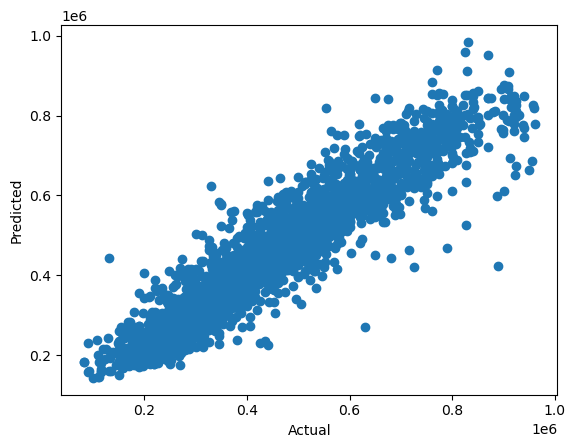

In [33]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

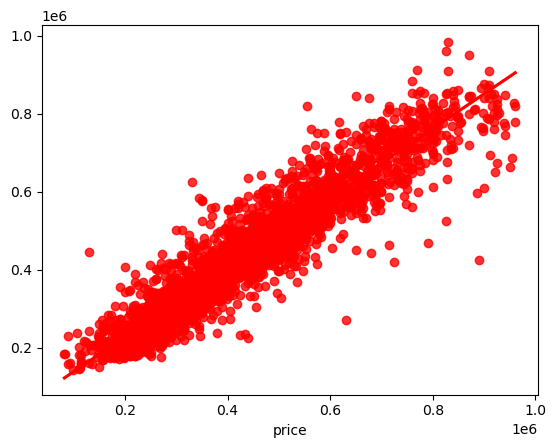

In [34]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');


In [35]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
13673,321000.0,299034.371497,21965.628503
6602,380000.0,343504.299915,36495.700085
10166,402000.0,468911.857420,-66911.857420
881,435000.0,235957.862941,199042.137059
6088,625000.0,590356.150559,34643.849441
...,...,...,...
3373,550000.0,542415.041638,7584.958362
14380,465000.0,536574.874154,-71574.874154
5629,350000.0,353947.643809,-3947.643809
10137,159995.0,189142.814377,-29147.814377


In [36]:
input_data = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Reshape the input data to a 2D array (assuming you have 1 sample)
input_data = input_data.reshape(1, -1)

In [37]:
lin_model.predict(input_data)

array([690921.40186191])